In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd


# X: inputs to be clustered, with n-by-d size
# k: number of clusters
# epsilon - convergence criterion
# C: centroids
def KMeans(X, k, initial_label, epsilon) :
    n, d = X.shape
    new_label = initial_label
    C = np.zeros((k,d)) # starts with empty centroids
    L_new = -1 # starts with negative loss
    while True :
        
        label = new_label
        L = L_new
        
        # obtain new centroid for each cluster
        for j in range(k) :
            index_label = (label == j)
            if any(index_label) :
                C[j,:] = np.mean(X[index_label,:],0)
        
        #assign labels 
        norm_C= np.dot(np.ones((n,1)),np.reshape(np.power(np.linalg.norm(C,axis = 1),2),(1,k)))
        objective_function = -2*(np.dot(X,np.transpose(C))) + norm_C #objective function
        new_label = np.argmin(objective_function,axis=1)#cluster that gives smallest loss
        
        # obtain loss
        sum_norm_x = np.power(np.linalg.norm(X),2)
        L_new = (sum([objective_function[i,new_label[i]] for i in range (n)]) + sum_norm_x) / n
        
        # check if the new change is really small
        if (L_new > (L - epsilon)) and (L != -1) : 
            break
    return new_label, L_new, C

# k: number of clusters
# target_label: true label
# cluster_error: error in clustering
def ClusterError(k,target_label,label) :
    min_error = 1000 # initialize error big enough to be replaced later
    
    for permutation in itertools.permutations(range(k)) :
        label_permuted = [permutation[i] for i in label]
        cur_error = np.mean([target_label[i] != label_permuted[i] for i in range(len(target_label))])
        if cur_error < min_error :
            min_error = cur_error
    cluster_error = min_error
    return cluster_error


# L_lower - SVD lower bound
def LowerBound(X,k) :
    n,d = X.shape
    u,s,vh = np.linalg.svd(X)
    L_lower = np.sum(np.power(s[k:],2))/n
    return L_lower

In [49]:
n = 10000
d = 10
k = 3
s_values = np.linspace(0.5,10,20)
trials = 10
s_length = len(s_values)
Loss = np.zeros((s_length,trials))
Error = np.zeros((s_length,trials))
Loss_lower = np.zeros((s_length,trials))
for i in range(s_length) :
    s = s_values[i]
    for j in range(trials) :
        
        # make X to be clustered and randomly assign to a cluster
        X = np.random.randn(n,d)
        target_label = np.random.randint(k,size=n)
        for p in range(n) :
            X[p,target_label[p]] += s
        # run KMeans
        initial_label = np.random.randint(k,size=n)
        epsilon = 1/1000000
        label, L, C = KMeans(X,k,initial_label,epsilon)
        Loss[i,j] = L
        Error[i,j] = ClusterError(k,target_label,label)
        Loss_lower[i,j] = LowerBound(X,k)
mean_Error = np.mean(Error,1)

print('s values:')
print(s_values)
print('mean error:')
print(mean_Error)
plt.plot(s_values,mean_Error,'o-')
plt.xlabel('s')
plt.ylabel('fraction missclassified')
plt.title('Mean Fraction Missclassified')
plt.savefig('FractionMissclassified.jpg')
plt.close()

KeyboardInterrupt: 

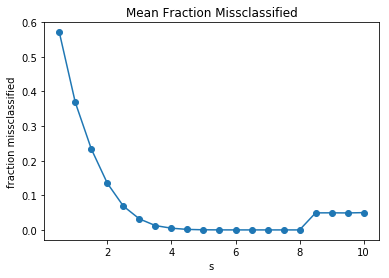

In [23]:
plt.plot(s_values,mean_Error,'o-')
plt.xlabel('s')
plt.ylabel('fraction missclassified')
plt.title('Mean Fraction Missclassified')
plt.savefig('FractionMissclassified.jpg')

SyntaxError: invalid syntax (<ipython-input-4-84c1d6c84102>, line 3)

In [6]:
data = [s_values, mean_Error]
df = pd.DataFrame(data)
df.columns = [''] * len(df.columns)
df

,,,,,,,,,,,,,,,,,,,,
0,0.5000,1.00000,1.50000,2.00000,2.50000,3.00000,3.50000,4.00000,4.50000,5.00000,5.5000,6.0,6.50000,7.0,7.5,8.0,8.50000,9.00000,9.50000,10.00000
1,0.5709,0.36806,0.23365,0.13466,0.06873,0.03186,0.01249,0.00496,0.00146,0.00037,0.0001,0.0,0.00001,0.0,0.0,0.0,0.04922,0.04935,0.04905,0.04992


In [48]:
mean_Loss = np.mean(Loss,1)
mean_Loss_lower = np.mean(Loss_lower,1)
print('mean loss:')
print(mean_Loss)
print('mean loss lower bound:')
print(mean_Loss_lower)
plt.plot(s_values,meanLoss,'o-',label='KMeans loss')
plt.plot(s_values,mean_Loss_lower,'o-',label='loss lower bound')
plt.xlabel('s')
plt.ylabel('Loss')
plt.title('Comparing Loss with Lower Bound')
plt.savefig('CompareWithLower.jpg')


IndexError: tuple index out of range

In [58]:
# PART C
data = np.genfromtxt('seeds_dataset.txt',delimiter='\t')
n,d = data.shape
d = d - 1
X = data[:,:d]
target_label = data[:,d] - 1
trials = 10
k = 3
epsilon = 1e-6
Loss = np.zeros(trials)
Error = np.zeros(trials)
for j in range(trials) :
    initial_label = np.random.randint(k,size=n)
    label,L,C = KMeans(X,k,initial_label,epsilon)
    Loss[j] = L
    Error[j] = ClusterError(k,target_label,label)
Loss_lower_seeds = LowerBound(X,k)


# pre-process the data by having each column mean 0 and std 1
X_proc = np.zeros((n,d))
for i in range(d) :
    X_proc[:,i] = (X[:,i] - np.mean(X[:,i])) / np.std(X[:,i])

LossNormal = np.zeros(trials)
ErrorNormal = np.zeros(trials)
for j in range(trials) :
    initial_label = np.random.randint(k,size=n)
    label,L,C = KMeans(X_proc,k,initial_label,epsilon)
    LossNormal[j] = L
    ErrorNormal[j] = ClusterError(k,target_label,label)
Loss_lower_bound = LowerBound(X_proc,k)


In [34]:
data = [Loss, Error, Error*n]
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9
0,2.803724,2.796755,2.796755,2.803724,2.796755,2.796755,2.803724,2.796755,2.796755,2.803724
1,0.109524,0.104762,0.104762,0.109524,0.104762,0.104762,0.109524,0.104762,0.104762,0.109524
2,23.000000,22.000000,22.000000,23.000000,22.000000,22.000000,23.000000,22.000000,22.000000,23.000000


In [36]:
dataNormal = [LossNormal, ErrorNormal, ErrorNormal*n]
dfNormal = pd.DataFrame(data)
dfNormal

,0,1,2,3,4,5,6,7,8,9
0,2.051509,2.050757,2.050757,2.050757,2.052993,2.050757,2.050757,2.053184,2.051509,2.051930
1,0.066667,0.080952,0.080952,0.080952,0.080952,0.080952,0.080952,0.061905,0.066667,0.071429
2,14.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,13.000000,14.000000,15.000000


In [52]:
np.mean(ErrorNormal*n)



790.4761904761905

In [51]:
np.mean(Error*n)


675.645

mean loss:
[8.97110964 9.17594482 9.40457147 9.64610032 8.83383376 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
mean loss lower bound:
[6.9663583  6.99805972 6.99190698 7.00866153 5.61401935 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


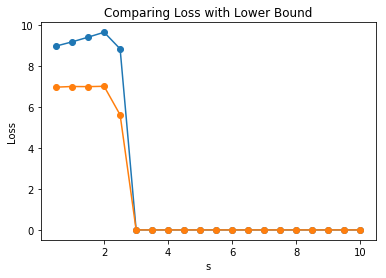

In [55]:
mean_Loss = np.mean(Loss,1)
mean_Loss_lower = np.mean(Loss_lower,1)
print('mean loss:')
print(mean_Loss)
print('mean loss lower bound:')
print(mean_Loss_lower)
plt.plot(s_values,mean_Loss,'o-',label='KMeans loss')
plt.plot(s_values,mean_Loss_lower,'o-',label='loss lower bound')
plt.xlabel('s')
plt.ylabel('Loss')
plt.title('Comparing Loss with Lower Bound')
plt.savefig('CompareWithLower.jpg')

In [59]:
Loss_lower_seeds


0.05593256596503759

In [60]:
Loss_lower_bound


0.09322252847568852